In [27]:
import pandas as pd
import wrangle as w
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
train, val, test = w.wrangle_glassdoor('../data/glassdoor_reviews.csv')

Possible Questions:

Common words between 3-star companies and 4-star companies?

Review Lengths between 3-star companies and 4-star companies?

Unique words for 3-star companies and 4-star companies?

Number of unique words for 3-star companies and 4-star companies?


### Sentiment

In [4]:
import nltk.sentiment
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores(train.iloc[2]['cons_lemmatized'] + train.iloc[2]['pros_lemmatized'])

{'neg': 0.087, 'neu': 0.491, 'pos': 0.422, 'compound': 1.0}

In [32]:
train

,url,pros,cons,name,rating,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int,pros_sentiment,cons_sentiment,total_sentiment
490,https://www.glassdoor.com/Reviews/Perficient-R...,Perficient is an ethical company that actually...,"None at all, love, love, love this company!\nI...",Perficient,4.1,perficient is an ethical company that actually...,perficient ethical company actually value empl...,none at all love love love this company\nit is...,none love love love company good company canno...,Four,4,1.0000,0.9995,1.0000
273,https://www.glassdoor.com/Reviews/Farmers-Insu...,"This company is the best ever.\nLarge, establi...",I have nothing bad to say.\nManagement company...,Farmers Insurance Group,3.4,this company is the best ever\nlarge establish...,company best ever large established company so...,i have nothing bad to say\nmanagement company ...,nothing bad say management company get paid re...,Three,3,1.0000,0.9984,1.0000
30,https://www.glassdoor.com/Reviews/MIT-Reviews-...,"Very inspiring place to work at, to feel that ...",Depends on the project to how much organizatio...,MIT,4.4,very inspiring place to work at to feel that s...,inspiring place work feel something new happen...,depends on the project to how much organizatio...,depends project much organization team include...,Four,4,1.0000,0.9892,1.0000
406,https://www.glassdoor.com/Reviews/Morningstar-...,"- Coworkers are amicable, and they're overall ...",- Base pay for the area could be slightly high...,Morningstar,4.1,coworkers are amicable and they ' re overall v...,coworkers amicable ' overall supportive unlimi...,base pay for the area could be slightly higher...,base pay area could slightly higher bonus prog...,Four,4,1.0000,0.9968,1.0000
163,https://www.glassdoor.com/Reviews/ICF-Reviews-...,Loved the job and the people. Great flexibilit...,"None, I would fully recommend\nThere was disho...",ICF,3.8,loved the job and the people great flexibility...,loved job people great flexibility fun project...,none i would fully recommend\nthere was dishon...,none would fully recommend dishonest hidden in...,Three,3,1.0000,0.9992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,https://www.glassdoor.com/Reviews/Dignity-Heal...,Awesome coworkers that were team based! Annual...,"Most days were very busy\nIt's healthcare, so ...",Dignity Health,3.8,awesome coworkers that were team based annual ...,awesome coworkers team based annual review wag...,most days were very busy\nit ' s healthcare so...,day busy ' healthcare entire staff scheme holi...,Three,3,1.0000,0.9956,1.0000
303,https://www.glassdoor.com/Reviews/Ace-Hardware...,Great workers and managers they welcome you li...,Barely get hours cluster junky\nIf you happen ...,Ace Hardware,3.8,great workers and managers they welcome you li...,great worker manager welcome like family cashi...,barely get hours cluster junky\nif you happen ...,barely get hour cluster junky happen employed ...,Three,3,1.0000,0.9974,1.0000
4,https://www.glassdoor.com/Reviews/Chick-fil-A-...,Very open honest and integrity filled work\nPo...,none that I can think of\nLimited hours of ope...,Chick-fil-A Restaurants,3.9,very open honest and integrity filled work\npo...,open honest integrity filled work positive wor...,none that i can think of\nlimited hours of ope...,none think limited hour operation chickfila kn...,Three,3,1.0000,-0.9975,1.0000
233,https://www.glassdoor.com/Reviews/Foundever-Re...,Best company to work in Canada\nHelpful co-wor...,"The work culture is good, you will like to wor...",Foundever,3.6,best company to work in canada\nhelpful cowork...,best company work canada helpful coworkers eas...,the work culture is good you will like to work...,work culture good like work policy put place p...,Three,3,0.9999,-0.9691,0.9999


In [22]:
train['pros_sentiment'] = train['pros_lemmatized'].apply(lambda doc:\
                                                   sia.polarity_scores(doc)['compound'])
train['cons_sentiment'] = train['cons_lemmatized'].apply(lambda doc:\
                                                   sia.polarity_scores(doc)['compound'])
train['total_sentiment'] =(train['pros_lemmatized'] + train['cons_lemmatized'])\
                            .apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [24]:
train.groupby('binned_rating_int')[['pros_sentiment', 'cons_sentiment', 'total_sentiment']]\
                                    .mean()

,pros_sentiment,cons_sentiment,total_sentiment
binned_rating_int,,,
2,0.999933,0.149378,0.999922
3,0.999955,0.285908,0.999961
4,0.999983,0.666374,0.999989


In [34]:
train.groupby('binned_rating_int')[['pros_sentiment', 'cons_sentiment', 'total_sentiment']]\
                                    .median()

,pros_sentiment,cons_sentiment,total_sentiment
binned_rating_int,,,
2,0.9999,0.9946,0.9999
3,1.0000,0.9858,1.0000
4,1.0000,0.9963,1.0000


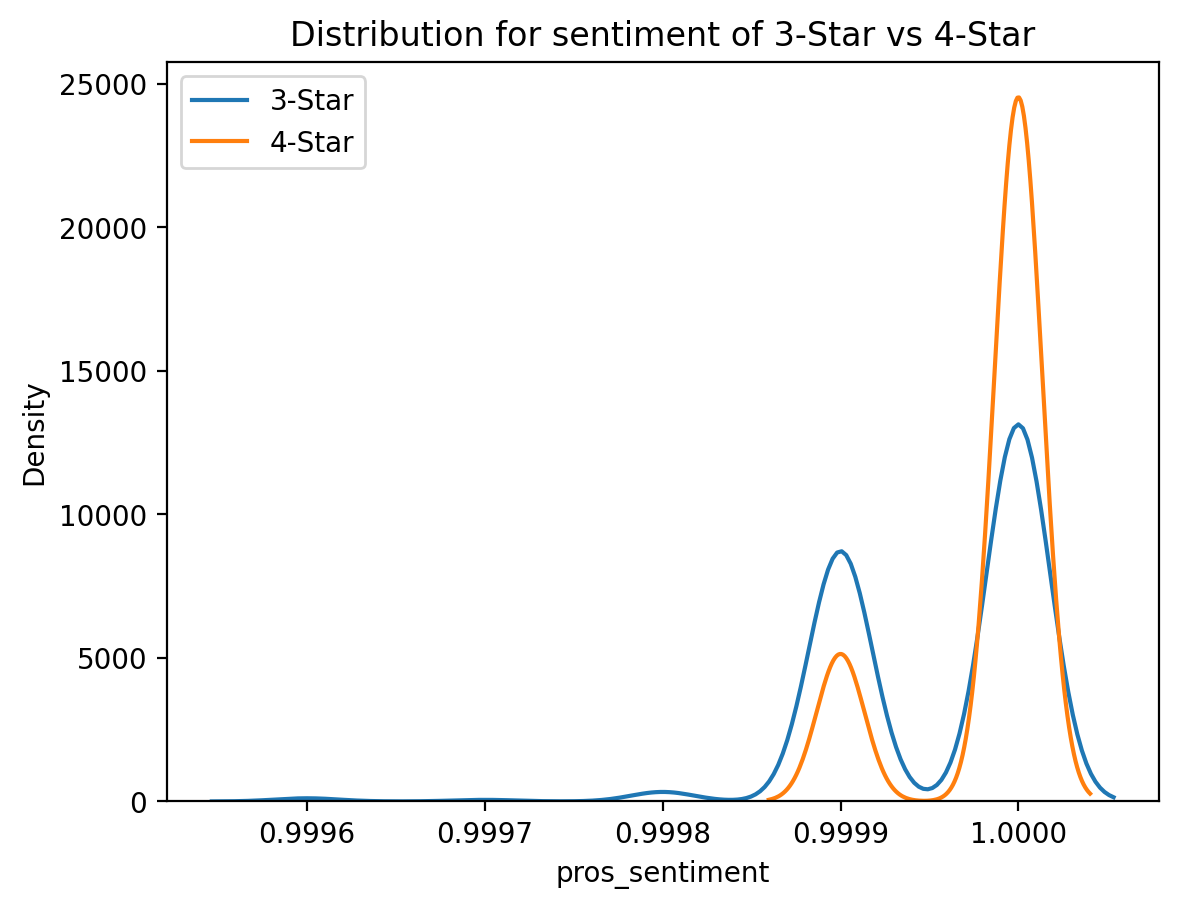

In [28]:
sns.kdeplot(train[train['binned_rating_int'] ==3]['pros_sentiment'], label='3-Star')
sns.kdeplot(train[train['binned_rating_int'] ==4]['pros_sentiment'], label='4-Star')

plt.legend(['3-Star', '4-Star'])
plt.title("Distribution for sentiment of 3-Star vs 4-Star")
plt.show()

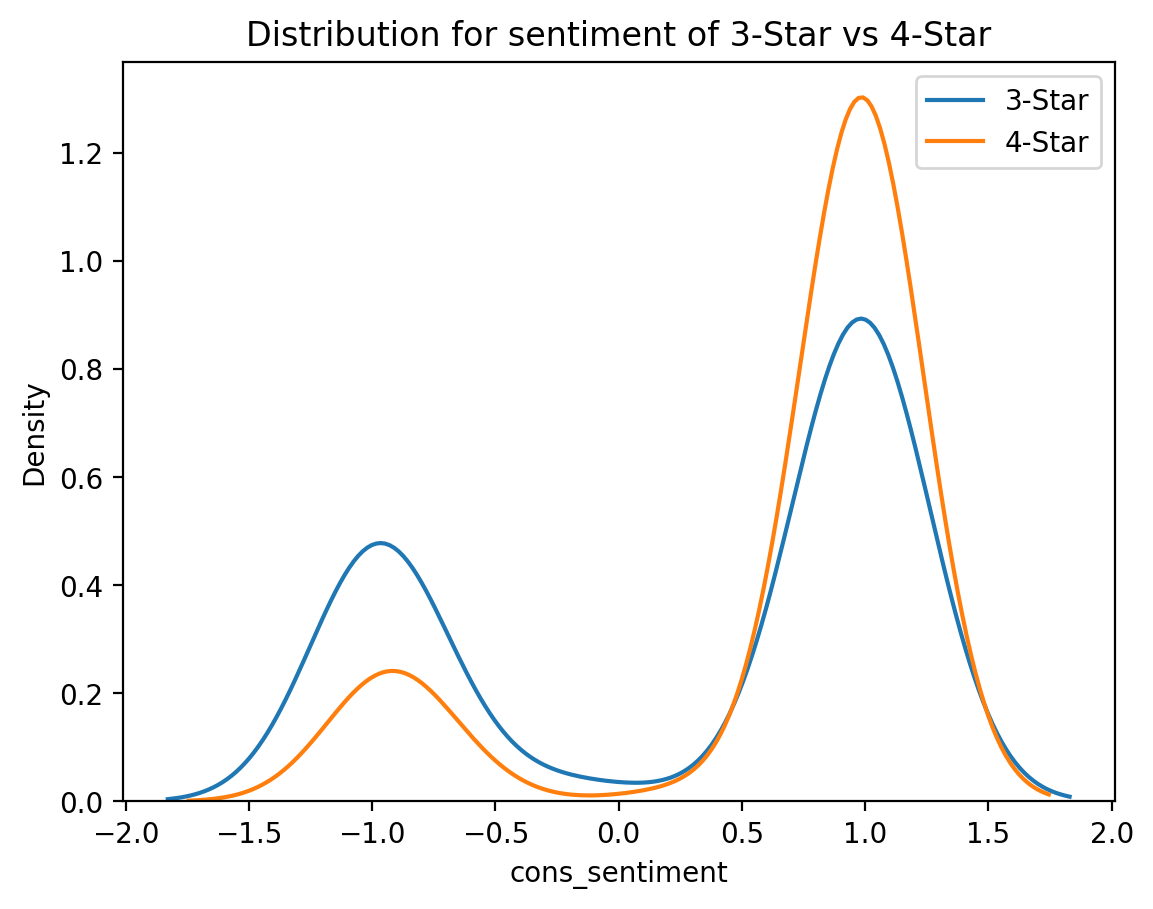

In [29]:
sns.kdeplot(train[train['binned_rating_int'] ==3]['cons_sentiment'], label='3-Star')
sns.kdeplot(train[train['binned_rating_int'] ==4]['cons_sentiment'], label='4-Star')

plt.legend(['3-Star', '4-Star'])
plt.title("Distribution for sentiment of 3-Star vs 4-Star")
plt.show()

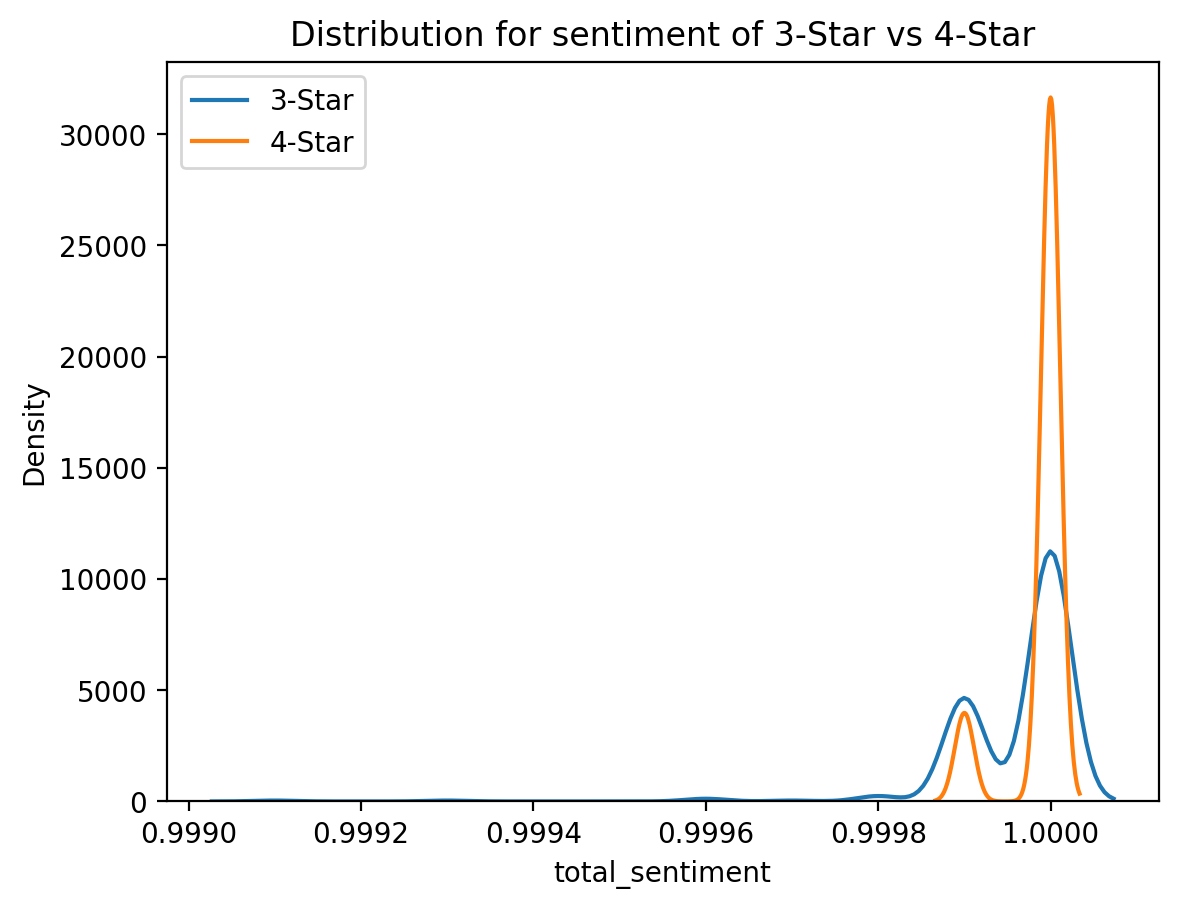

In [30]:
sns.kdeplot(train[train['binned_rating_int'] ==3]['total_sentiment'], label='3-Star')
sns.kdeplot(train[train['binned_rating_int'] ==4]['total_sentiment'], label='4-Star')

plt.legend(['3-Star', '4-Star'])
plt.title("Distribution for sentiment of 3-Star vs 4-Star")
plt.show()

How do sentinment scores correlate with ratings?

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_42595/1222473334.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_42595/1222473334.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


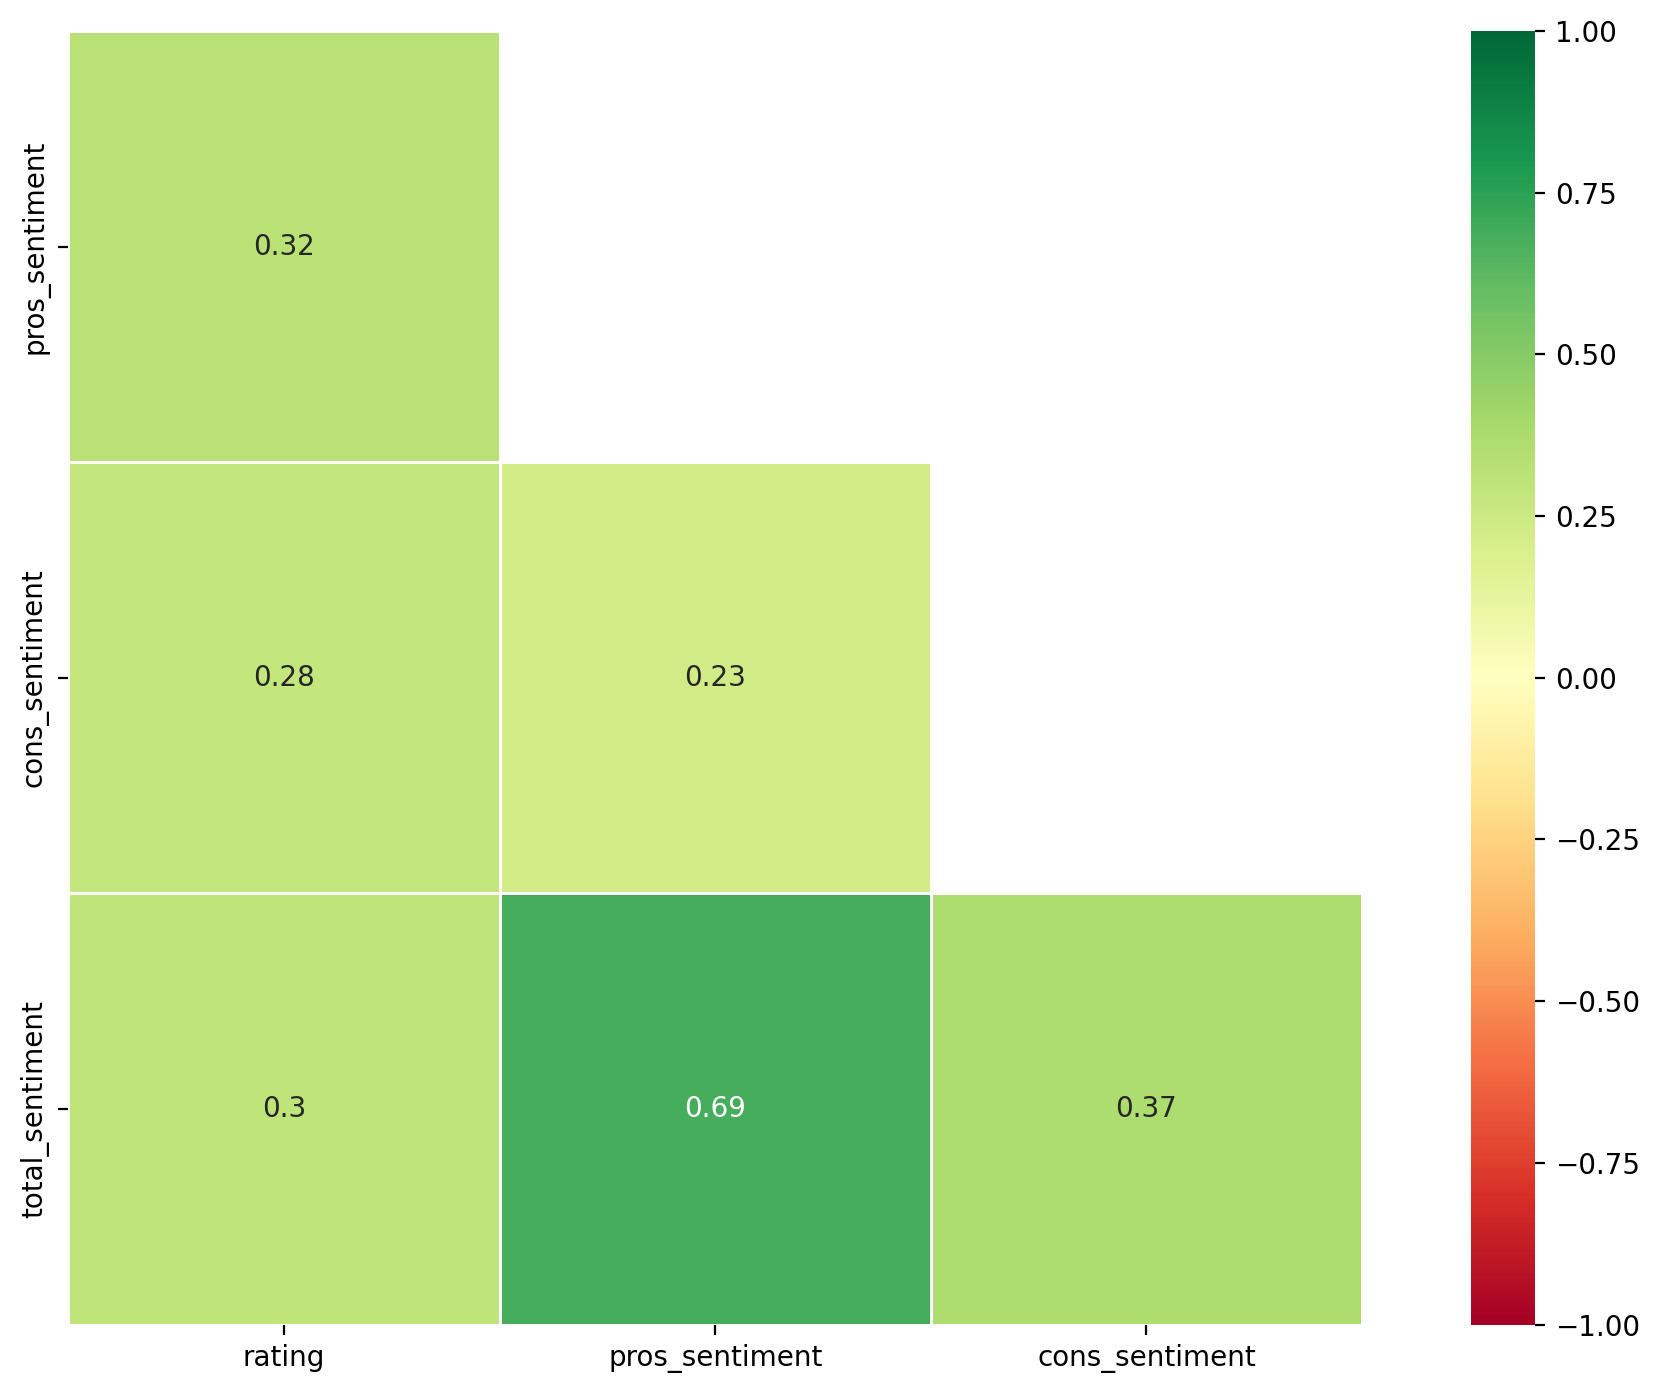

In [31]:
plt.figure(figsize=(len(train.columns), len(train.columns) * .6))

mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                     cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.show()

In [ ]:
def generate_ngrams(text, ):
    words = text.split()
    trigrams = []

    if len(words) < 3:
        return trigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            trigram = " ".join(words[i:i+3])
            trigrams.append(trigram)

    return trigrams